Alanna Fischer

aef222

Problem Set #7

# Question 1

A)

'frog' = "frog"

'gorf' = "golf"

'forg' = "for"

'grof' = "grow"

B)

'foog' = "foot"

'freg' = "free"

'frg' = "fro"

'frgge' = "free"

'froge' = "frog"

'froog' = "frog"

C)

In [52]:
import re
from collections import Counter
import scipy

def words(text): return re.findall(r'\w+', text.lower())

WORDS = {"argue":10074, "borg":30, "dreg":33, "erg":14, "fadge":36, "fag":632, "fg": 176,
"fig":2921, "flog":1055, "fog":13651, "foggy":1884, "foo": 227, "food": 108140, "fool": 55324,
"foon": 39, "foot":128053, "for": 7097981, "fora": 148, "forage": 2489, "ford": 15620, "fore": 6699,
"forge":3893, "forgo":383, "fork":8219, "form":307506, "fort": 23113, "frag": 34, "frame": 34362,
"free": 235012, "fret": 4234, "fri": 367, "fridge": 15, "frig": 30, "frigga": 196, "fringe": 5423,
"fro": 18586, "froe": 22, "frog":20000, "frore":75, "froze":2685, "fry": 3486, "fudge": 508,
"fug": 8, "fugue": 458, "go": 816536, "god": 552668, "golf": 2801, "good": 966602, "goof": 15,
"gore": 2213, "gorge": 6177, "gory": 999, "got": 432016, "greg": 2020, "groan": 9995, "grog": 1385,
"grot": 234, "grow": 64005, "grown": 57772, "lord": 422407, "more": 1899787, "nor": 349691, "of": 33950064,
"off": 545832, "or": 4228287, "prof": 73, "rage": 38949, "reg": 1143, "urge": 11753, "work": 829823}

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / float(N)

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [53]:
print correction('foog')
print correction('freg')
print correction('frg')
print correction('frgge')
print correction('froge')
print correction('froog')

foot
free
frog
free
frog
frog


# Question 2

In [54]:
from scipy import stats

In [55]:
prob1 = [11, 19, 15, 16, 4, 3, 10, 16, 6, 8, 13, 10, 11, 3, 1, 1, 15, 1, 8, 13, 19, 4, 16, 18, 11]
prob2 = [16, 13, 13, 14, 0, 12, 14, 14, 16, 14, 0, 15, 16, 14, 14, 16, 11, 16, 14, 17, 15, 18, 15, 19, 20]
prob3 = [14, 15, 13, 17, 2, 0, 6, 18, 2, 10, 16, 12, 11, 0, 3, 5, 18, 0, 9, 12, 15, 5, 12, 16, 10]
prob4 = [13, 6, 6, 6, 16, 1, 5, 5, 12, 10, 22, 13, 12, 5, 5, 15, 3, 15, 8, 19, 8, 17, 8, 16, 19]
prob5 = [14, 5, 5, 8, 19, 4, 8, 8, 14, 8, 19, 10, 14, 8, 8, 14, 1, 14, 8, 16, 10, 17, 10, 18, 19]



p_one_two = stats.pearsonr(prob1,prob2)
p_one_three = stats.pearsonr(prob1,prob3)
p_one_four = stats.pearsonr(prob1,prob4)
p_one_five = stats.pearsonr(prob1,prob5)
p_two_three = stats.pearsonr(prob2,prob3)
p_two_four = stats.pearsonr(prob2,prob4)
p_two_five = stats.pearsonr(prob2,prob5)
p_three_four = stats.pearsonr(prob3,prob4)
p_three_five = stats.pearsonr(prob3,prob5)
p_four_five = stats.pearsonr(prob4,prob5)

print '1 and 2 =', p_one_two
print '1 and 3 =', p_one_three
print '1 and 4 =', p_one_four
print '1 and 5 =', p_one_five
print '2 and 3 =', p_two_three
print '2 and 4 =', p_two_four
print '2 and 5 =', p_two_five
print '3 and 4 =', p_three_four
print '3 and 5 =', p_three_five
print '4 and 5 =', p_four_five

1 and 2 = (0.050586526557698866, 0.81022415653399427)
1 and 3 = (0.90124339750433413, 8.0172433419151881e-10)
1 and 4 = (-0.09871918431022278, 0.63872995375217279)
1 and 5 = (-0.16066895153338528, 0.4429499303008454)
2 and 3 = (0.0052930591988529698, 0.97996685945441797)
2 and 4 = (-0.048140216756561716, 0.81924960565698401)
2 and 5 = (-0.032136013943635598, 0.87879824998682343)
3 and 4 = (0.0053040395307159338, 0.97992530933153654)
3 and 5 = (-0.12413954149917189, 0.55437658142197432)
4 and 5 = (0.92753156098714651, 2.6030232621609268e-11)


In [56]:
s_one_two = stats.spearmanr(prob1,prob2)
s_one_three = stats.spearmanr(prob1,prob3)
s_one_four = stats.spearmanr(prob1,prob4)
s_one_five = stats.spearmanr(prob1,prob5)
s_two_three = stats.spearmanr(prob2,prob3)
s_two_four = stats.spearmanr(prob2,prob4)
s_two_five = stats.spearmanr(prob2,prob5)
s_three_four = stats.spearmanr(prob3,prob4)
s_three_five = stats.spearmanr(prob3,prob5)
s_four_five = stats.spearmanr(prob4,prob5)

print '1 and 2 =', s_one_two
print '1 and 3 =', s_one_three
print '1 and 4 =', s_one_four
print '1 and 5 =', s_one_five
print '2 and 3 =', s_two_three
print '2 and 4 =', s_two_four
print '2 and 5 =', s_two_five 
print '3 and 4 =', s_three_four
print '3 and 5 =', s_three_five
print '4 and 5 =', s_four_five

1 and 2 = SpearmanrResult(correlation=-0.047856172983785403, pvalue=0.82029903289502526)
1 and 3 = SpearmanrResult(correlation=0.88697544915239213, pvalue=3.5208408568624962e-09)
1 and 4 = SpearmanrResult(correlation=-0.059519211383024712, pvalue=0.77747527833678298)
1 and 5 = SpearmanrResult(correlation=-0.104796858600977, pvalue=0.61810721213147257)
2 and 3 = SpearmanrResult(correlation=-0.10992354920952695, pvalue=0.60092621915762856)
2 and 4 = SpearmanrResult(correlation=0.5407624604012331, pvalue=0.0052539887883431037)
2 and 5 = SpearmanrResult(correlation=0.56228899319333225, pvalue=0.0034379811875388001)
3 and 4 = SpearmanrResult(correlation=-0.030989781733992611, pvalue=0.88309175412387941)
3 and 5 = SpearmanrResult(correlation=-0.11116544434358877, pvalue=0.59679478013877729)
4 and 5 = SpearmanrResult(correlation=0.92465613292639481, pvalue=4.0140875719289323e-11)


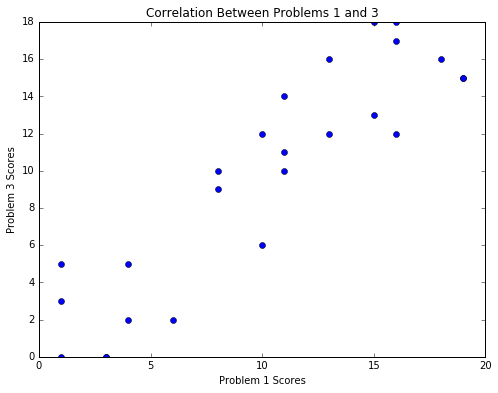

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(figsize = (8,6))
plt.plot(prob1, prob3, 'o')
plt.title('Correlation Between Problems 1 and 3')
plt.xlabel('Problem 1 Scores')
plt.ylabel('Problem 3 Scores')

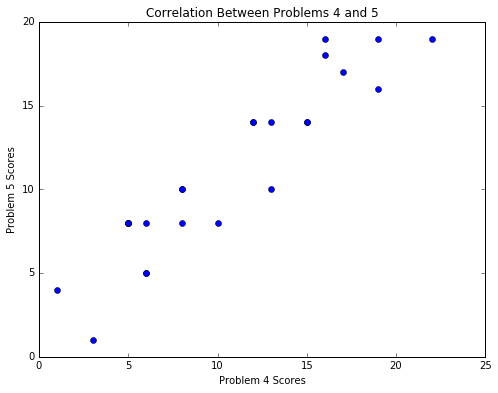

In [58]:
plt.figure(figsize = (8,6))
plt.plot(prob4, prob5, 'o')
plt.title('Correlation Between Problems 4 and 5')
plt.xlabel('Problem 4 Scores')
plt.ylabel('Problem 5 Scores')

# Question 3

In [59]:
fblikes = [1900, 5300, 224, 17800, 21400, 9600, 860, 147, 2800, 759, 2100, 3700, 901,
           18900, 2000, 10300, 276, 1000, 298, 39200, 1900, 21800, 36600, 3000, 628,
           1100, 5200, 2300, 788, 8900]
tweets = [157, 1100, 668, 1500, 1000, 1000, 178, 66, 209, 251, 46, 376, 89, 1400, 453,
          1900, 129, 385, 20, 2900, 192, 497, 4900, 537, 266, 258, 358, 481, 301, 2100]
comments = [366, 454, 9, 1900, 1700, 58, 630, 57, 396, 40, 476, 821, 206, 662, 606, 77,
            444, 121, 27, 573, 189, 189, 1500, 1400, 31, 141, 393, 11, 32, 1400]

A)

I.

In [60]:
p_fbTweets = stats.pearsonr(fblikes,tweets)
s_fbTweets = stats.spearmanr(fblikes,tweets)
p_fbComments = stats.pearsonr(fblikes,comments)
s_fbComments = stats.spearmanr(fblikes,comments)
p_tweetsComments = stats.pearsonr(tweets,comments)
s_tweetsComments = stats.spearmanr(tweets,comments)

print 'Pearson Correlation of FB Likes and Tweets =', p_fbTweets
print 'Spearman Correlation of FB Likes and Tweets =', s_fbTweets
print 'Pearson Correlation of FB Likes and Comments =', p_fbComments
print 'Spearman Correlation of FB Likes and Comments =', s_fbComments
print 'Pearson Correlation of Comments and Tweets =', p_tweetsComments
print 'Spearman Correlation of Comments and Tweets =', s_tweetsComments

Pearson Correlation of FB Likes and Tweets = (0.83694718969598447, 8.236412524718429e-09)
Spearman Correlation of FB Likes and Tweets = SpearmanrResult(correlation=0.76301735647530056, pvalue=9.456001835691113e-07)
Pearson Correlation of FB Likes and Comments = (0.50734271446655976, 0.0042148689533096995)
Spearman Correlation of FB Likes and Comments = SpearmanrResult(correlation=0.60765550615416419, pvalue=0.0003688055434274629)
Pearson Correlation of Comments and Tweets = (0.50969515653754716, 0.0040135265151552448)
Spearman Correlation of Comments and Tweets = SpearmanrResult(correlation=0.38299766566244886, pvalue=0.036704550981923489)


II.

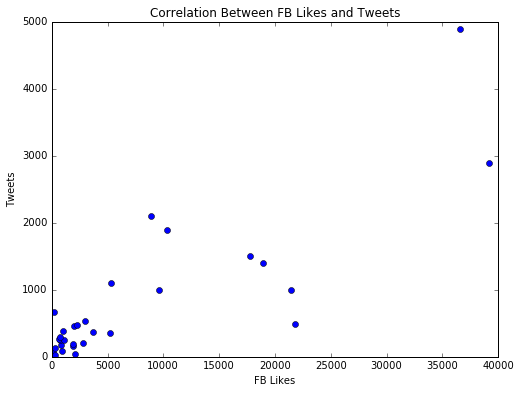

In [61]:
plt.figure(figsize = (8,6))
plt.plot(fblikes, tweets, 'o')
plt.title('Correlation Between FB Likes and Tweets')
plt.xlabel('FB Likes')
plt.ylabel('Tweets')

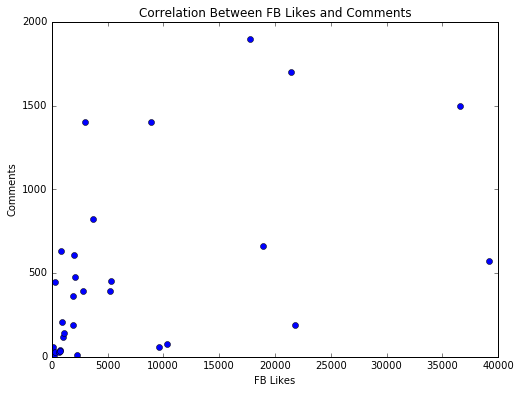

In [62]:
plt.figure(figsize = (8,6))
plt.plot(fblikes, comments, 'o')
plt.title('Correlation Between FB Likes and Comments')
plt.xlabel('FB Likes')
plt.ylabel('Comments')

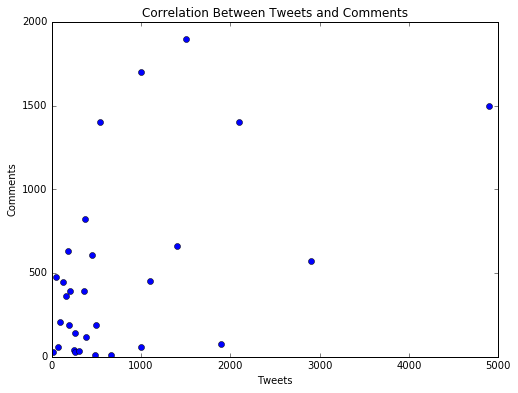

In [63]:
plt.figure(figsize = (8,6))
plt.plot(tweets, comments, 'o')
plt.title('Correlation Between Tweets and Comments')
plt.xlabel('Tweets')
plt.ylabel('Comments')

B)

In [64]:
import re
import numpy as np
from collections import Counter

ptexts=[open('ps2data/p{}.txt'.format(i)).read() for i in range(30)]
testwords = ['of', 'in', 'trump', 'was', 'president', 'order', 'more', 'were',
             'what', 'court', 'one', 'law', 'been', 'senate', 'new', 'executive',
             'people', 'democrats', 'should', 'could', 'american', 'immigration', 'republicans', 'against',
             'government', 'up', 'national', 'some', 'down', 'obama', 'another', 'both']

for x in testwords:
    test_word_count = []
    for text in ptexts:
        word_count = Counter(re.findall("[a-z']+", text.lower()))
        test_word_count.append(word_count[x])
    print 'Pearson Correlation:', x, 'and FB Likes =', stats.pearsonr(test_word_count, fblikes)
    print 'Pearson Correlation:', x, 'and Tweets =', stats.pearsonr(test_word_count, tweets)
    print 'Pearson Correlation:', x, 'and Comments =', stats.pearsonr(test_word_count, comments)
    print 'Spearman Correlation:', x, 'and FB Likes =', stats.spearmanr(test_word_count, fblikes)
    print 'Spearman Correlation:', x, 'and Tweets =', stats.spearmanr(test_word_count, tweets)
    print 'Spearman Correlation:', x, 'and Comments =', stats.spearmanr(test_word_count, comments)

Pearson Correlation: of and FB Likes = (-0.13648157070114716, 0.47204726117044682)
Pearson Correlation: of and Tweets = (0.011339858726361337, 0.95257493267544024)
Pearson Correlation: of and Comments = (-0.35803831054601604, 0.052054843912439711)
Spearman Correlation: of and FB Likes = SpearmanrResult(correlation=-0.19332956396728526, pvalue=0.30601816232771273)
Spearman Correlation: of and Tweets = SpearmanrResult(correlation=0.033578879835056467, pvalue=0.86017335527521288)
Spearman Correlation: of and Comments = SpearmanrResult(correlation=-0.41727237686211882, pvalue=0.021781238480608259)
Pearson Correlation: in and FB Likes = (-0.3511996056814301, 0.057042671536425955)
Pearson Correlation: in and Tweets = (-0.22488397152908246, 0.23217295123769077)
Pearson Correlation: in and Comments = (-0.43095312740722291, 0.01742939168135621)
Spearman Correlation: in and FB Likes = SpearmanrResult(correlation=-0.36827623355632549, pvalue=0.04523898700124801)
Spearman Correlation: in and Tweet

FB Likes: national (0.40831088674815019), new (-0.44594917753371549) 

Tweets: should (0.58340815303081528), new (-0.43544033502909446) 

Comments: been (-0.36678408052217609), another (-0.44447944666057781

In [65]:
national_count = []
new_count = []
should_count = []
been_count = []
another_count = []

for text in ptexts:
    word_count = Counter(re.findall("[a-z']+", text.lower()))
    national_count.append(word_count['national'])
    new_count.append(word_count['new'])
    should_count.append(word_count['should'])
    been_count.append(word_count['been'])
    another_count.append(word_count['another'])

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

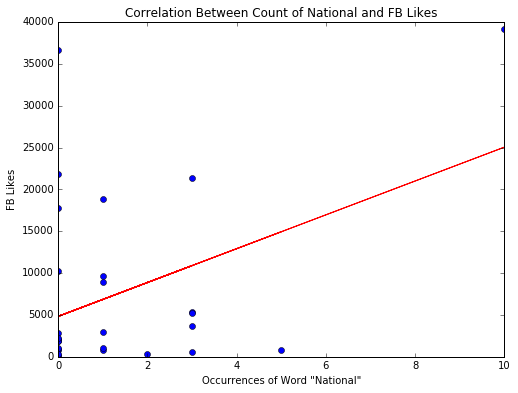

In [67]:
slope, intercept, r_value, p_value, std_err = stats.linregress(national_count, fblikes)
linRegArray = []
for x in national_count:
    temp = intercept + slope*x
    linRegArray.append(temp)

plt.figure(figsize = (8,6))
plt.plot(national_count, fblikes, 'o')
plt.plot(national_count, linRegArray, 'red')
plt.title('Correlation Between Count of National and FB Likes')
plt.xlabel('Occurrences of Word "National"')
plt.ylabel('FB Likes')

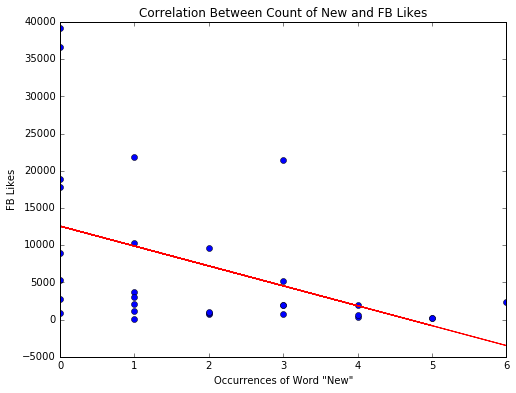

In [68]:
slope, intercept, r_value, p_value, std_err = stats.linregress(new_count, fblikes)
linRegArray = []
for x in new_count:
    temp = intercept + slope*x
    linRegArray.append(temp)

plt.figure(figsize = (8,6))
plt.plot(new_count, fblikes, 'o')
plt.plot(new_count, linRegArray, 'red')
plt.title('Correlation Between Count of New and FB Likes')
plt.xlabel('Occurrences of Word "New"')
plt.ylabel('FB Likes')

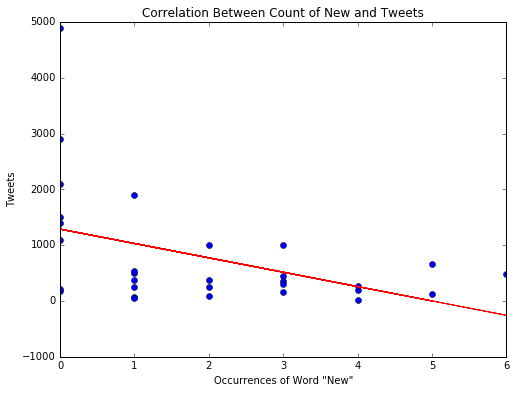

In [69]:
slope, intercept, r_value, p_value, std_err = stats.linregress(new_count, tweets)
linRegArray = []
for x in new_count:
    temp = intercept + slope*x
    linRegArray.append(temp)

plt.figure(figsize = (8,6))
plt.plot(new_count, tweets, 'o')
plt.plot(new_count, linRegArray, 'red')
plt.title('Correlation Between Count of New and Tweets')
plt.xlabel('Occurrences of Word "New"')
plt.ylabel('Tweets')

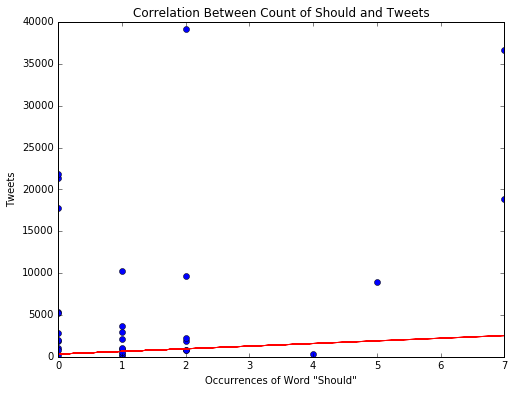

In [70]:
slope, intercept, r_value, p_value, std_err = stats.linregress(should_count, tweets)
linRegArray = []
for x in should_count:
    temp = intercept + slope*x
    linRegArray.append(temp)

plt.figure(figsize = (8,6))
plt.plot(should_count, fblikes, 'o')
plt.plot(should_count, linRegArray, 'red')
plt.title('Correlation Between Count of Should and Tweets')
plt.xlabel('Occurrences of Word "Should"')
plt.ylabel('Tweets')

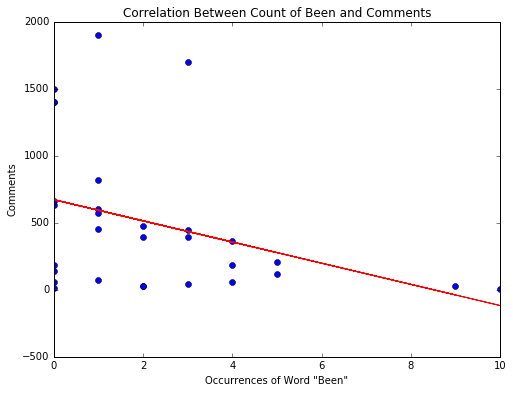

In [71]:
slope, intercept, r_value, p_value, std_err = stats.linregress(been_count, comments)
linRegArray = []
for x in been_count:
    temp = intercept + slope*x
    linRegArray.append(temp)

plt.figure(figsize = (8,6))
plt.plot(been_count, comments, 'o')
plt.plot(been_count, linRegArray, 'red')
plt.title('Correlation Between Count of Been and Comments')
plt.xlabel('Occurrences of Word "Been"')
plt.ylabel('Comments')

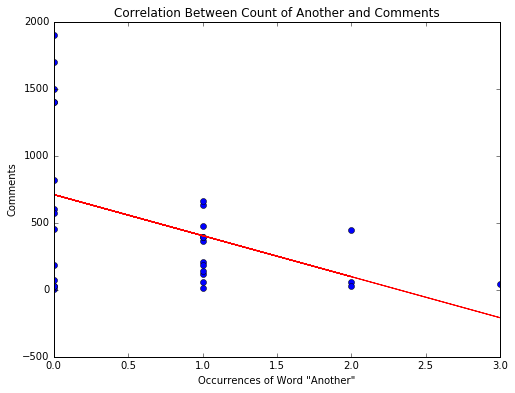

In [72]:
slope, intercept, r_value, p_value, std_err = stats.linregress(another_count, comments)
linRegArray = []
for x in another_count:
    temp = intercept + slope*x
    linRegArray.append(temp)

plt.figure(figsize = (8,6))
plt.plot(another_count, comments, 'o')
plt.plot(another_count, linRegArray, 'red')
plt.title('Correlation Between Count of Another and Comments')
plt.xlabel('Occurrences of Word "Another"')
plt.ylabel('Comments')

# Question 4

A)

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

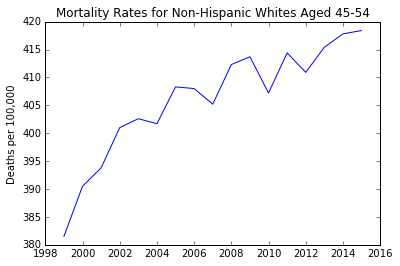

In [74]:
cdc0= open('cdc0.txt').read()

rates1 = []
rows = cdc0.split('\n')

for row in rows:
    data= row.split('\t')
    if len(data) == 12:
        if data[0] == '"Total"' and data[1] == '"White"' and data[5]== '"Not Hispanic or Latino"':
            rates1.append(data[11])
            
rates2 = []
for x in rates:
    x = x[:-1]
    rates2.append(float(x))

years = range(1999,2016)
plt.title("Mortality Rates for Non-Hispanic Whites Aged 45-54")
plt.plot(years, rates2)
plt.ylabel("Deaths per 100,000")

B)

I.

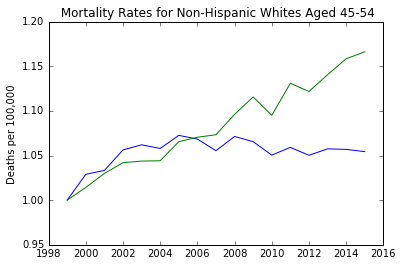

In [75]:
cdc0 = open('cdc0.txt').read()

male_rates = []
female_rates = []
rows = cdc0.split('\n')
for row in rows:
    data= row.split('\t')
    if len(data) == 12:
        if data[7] == '"Male"' and data [1] == '"White"' and data[5] == '"Not Hispanic or Latino"':
            male_rates.append(data[11])
        elif data[7] == '"Female"' and data [1] == '"White"' and data[5] == '"Not Hispanic or Latino"':
            female_rates.append(data[11])
            

male_rates_2=[]
for x in male_rates:
    x = x[:-1]
    male_rates_2.append(float(x)/483.7)

female_rates_2=[]
for x in female_rates:
    x = x[:-1]
    female_rates_2.append(float(x)/281.0)

    
years = range(1999,2016)
plt.title(" Mortality Rates for Non-Hispanic Whites Aged 45-54")
plt.plot(years,male_rates_2)
plt.ylabel("Deaths per 100,000")
    
years = range(1999,2016)
plt.title(" Mortality Rates for Non-Hispanic Whites Aged 45-54")
plt.plot(years,female_rates_2)
plt.ylabel("Deaths per 100,000")


II.

In [76]:
from scipy import stats

In [77]:
slopeF, interceptF, r_valueF, p_valueF, std_err = stats.linregress(years, ratesFemale2)
slopeM, interceptM, r_valueM, p_valueM, std_err = stats.linregress(years, ratesMale2)

slopeF = slopeF * 16
slopeM = slopeM * 16

print slopeF
print slopeM

0.157979205917
0.0274680060157


C)

I.

In [85]:
F1 = []
F2 = []
F3 = []
F4 = []
F5 = []
F6 = []
F7 = []
F8 = []
F9 = []
F10 = []
M1 = []
M2 = []
M3 = []
M4 = []
M5 = []
M6 = []
M7 = []
M8 = []
M9 = []
M10 = []

cdc1 = open('cdc1.txt').read()
rows = cdc1.split('\n')

for row in rows:
    data = row.split('\t')
    if len(data) == 14:
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS1"':
            F1.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS2"':
            F2.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS3"':
            F3.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS4"':
            F4.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS5"':
            F5.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS6"':
            F6.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS7"':
            F7.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS8"':
            F8.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS9"':
            F9.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Female"' and data[10] == '"HHS10"':
            F10.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS1"':
            M1.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS2"':
            M2.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS3"':
            M3.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS4"':
            M4.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS5"':
            M5.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS6"':
            M6.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS7"':
            M7.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS8"':
            M8.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS9"':
            M9.append(data[13])
        if data[1] == '"White"' and data[5] == '"Not Hispanic or Latino"' and data[7] == '"Male"' and data[10] == '"HHS10"':
            M10.append(data[13])

male_deaths_1 = []
for x in M1:
    x = x[:-1]
    male_deaths_1.append(float(x)/413.5)
    
male_deaths_2 = []
for x in M2:
    x = x[:-1]
    male_deaths_2.append(float(x)/451.3)
    
male_deaths_3 = []
for x in M3:
    x = x[:-1]
    male_deaths_3.append(float(x)/462.4)
    
male_deaths_4 = []
for x in M4:
    x = x[:-1]
    male_deaths_4.append(float(x)/570.5)
    
male_deaths_5 = []
for x in M5:
    x = x[:-1]
    male_deaths_5.append(float(x)/451.8)
    
male_deaths_6 = []
for x in M6:
    x = x[:-1]
    male_deaths_6.append(float(x)/526.3)
    
male_deaths_7 = []
for x in M7:
    x = x[:-1]
    male_deaths_7.append(float(x)/458.1)
    
male_deaths_8 = []
for x in M8:
    x = x[:-1]
    male_deaths_8.append(float(x)/394.1)
    
male_deaths_9 = []
for x in M9:
    x = x[:-1]
    male_deaths_9.append(float(x)/516.1)
    
male_deaths_10 = []
for x in M10:
    x = x[:-1]
    male_deaths_10.append(float(x)/421.1)
    
female_deaths_1 = []
for x in F1:
    x = x[:-1]
    female_deaths_1.append(float(x)/246.6)
    
female_deaths_2 = []
for x in F2:
    x = x[:-1]
    female_deaths_2.append(float(x)/267.3)
    
female_deaths_3 = []
for x in F3:
    x = x[:-1]
    female_deaths_3.append(float(x)/269.4)
    
female_deaths_4 = []
for x in F4:
    x = x[:-1]
    female_deaths_4.append(float(x)/308.6)
    
female_deaths_5 = []
for x in F5:
    x = x[:-1]
    female_deaths_5.append(float(x)/269.8)
    
female_deaths_6 = []
for x in F6:
    x = x[:-1]
    female_deaths_6.append(float(x)/313.5)
    
female_deaths_7 = []
for x in F7:
    x = x[:-1]
    female_deaths_7.append(float(x)/259.9)
    
female_deaths_8 = []
for x in F8:
    x = x[:-1]
    female_deaths_8.append(float(x)/233.9)
    
female_deaths_9 = []
for x in F9:
    x = x[:-1]
    female_deaths_9.append(float(x)/301.0)
    
female_deaths_10 = []
for x in F10:
    x = x[:-1]
    female_deaths_10.append(float(x)/264.9)

slopeM1, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_1)
slopeM2, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_2)
slopeM3, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_3)
slopeM4, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_4)
slopeM5, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_5)
slopeM6, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_6)
slopeM7, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_7)
slopeM8, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_8)
slopeM9, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_9)
slopeM10, interceptM, r_valueM, p_valueM, std_errM = stats.linregress(years, male_deaths_10)

slopeF1, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_1)
slopeF2, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_2)
slopeF3, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_3)
slopeF4, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_4)
slopeF5, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_5)
slopeF6, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_6)
slopeF7, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_7)
slopeF8, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_8)
slopeF9, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_9)
slopeF10, interceptF, r_valueF, p_valueF, std_errF = stats.linregress(years, female_deaths_10)

slopeM1 = slopeM1 * 16
slopeM2 = slopeM2 * 16
slopeM3 = slopeM3 * 16
slopeM4 = slopeM4 * 16
slopeM5 = slopeM5 * 16
slopeM6 = slopeM6 * 16
slopeM7 = slopeM7 * 16
slopeM8 = slopeM8 * 16
slopeM9 = slopeM9 * 16
slopeM10 = slopeM10 * 16

slopeF1 = slopeF1 * 16
slopeF2 = slopeF2 * 16
slopeF3 = slopeF3 * 16
slopeF4 = slopeF4 * 16
slopeF5 = slopeF5 * 16
slopeF6 = slopeF6 * 16
slopeF7 = slopeF7 * 16
slopeF8 = slopeF8 * 16
slopeF9 = slopeF9 * 16
slopeF10 = slopeF10 * 16

print 'Men in Region 1 =', slopeM1
print 'Men in Region 2 =', slopeM2
print 'Men in Region 3 =', slopeM3
print 'Men in Region 4 =', slopeM4
print 'Men in Region 5 =', slopeM5
print 'Men in Region 6 =', slopeM6
print 'Men in Region 7 =', slopeM7
print 'Men in Region 8 =', slopeM8
print 'Men in Region 9 =', slopeM9
print 'Men in Region 10 =', slopeM10
print 'Women in Region 1 =', slopeF1
print 'Women in Region 2 =', slopeF2
print 'Women in Region 3 =', slopeF3
print 'Women in Region 4 =', slopeF4
print 'Women in Region 5 =', slopeF5
print 'Women in Region 6 =', slopeF6
print 'Women in Region 7 =', slopeF7
print 'Women in Region 8 =', slopeF8
print 'Women in Region 9 =', slopeF9
print 'Women in Region 10 =', slopeF10


Men in Region 1 = 0.00311070014463
Men in Region 2 = -0.133192563531
Men in Region 3 = 0.0402757989009
Men in Region 4 = 0.069405921878
Men in Region 5 = 0.0456301157028
Men in Region 6 = 0.070853498154
Men in Region 7 = 0.143106009048
Men in Region 8 = 0.0678836365807
Men in Region 9 = -0.109288745531
Men in Region 10 = 0.0305362705519
Women in Region 1 = -0.014868883482
Women in Region 2 = -0.100746022315
Women in Region 3 = 0.147284452014
Women in Region 4 = 0.304563302962
Women in Region 5 = 0.145103853254
Women in Region 6 = 0.262463645745
Women in Region 7 = 0.279549449637
Women in Region 8 = 0.164223021402
Women in Region 9 = 0.00904175623738
Women in Region 10 = 0.151592535844


II.

In [88]:
#Men

from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('st99_d90','states',drawbounds=True) 

HHS1 = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont']
HHS2 = ['New Jersey', 'New York']
HHS3 = ['Delaware', 'Maryland', 'Pennsylvania', 'Virginia', 'West Virginia']
HHS4 = ['Alabama', 'Florida', 'Georgia', 'Kentucky', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']
HHS5 = ['Illinois', 'Indiana', 'Michigan', 'Minnesota', 'Ohio', 'Wisconsin']
HHS6 = ['Arkansas', 'Louisiana', 'New Mexico', 'Oklahoma', 'Texas']
HHS7 = ['Iowa', 'Kansas', 'Missouri', 'Nebraska']
HHS8 = ['Colorado', 'Montana', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming']
HHS9 = ['Arizona', 'California', 'Nevada']
HHS10 = ['Idaho', 'Oregon', 'Washington']

for x in HHS1:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.51))
for x in HHS2:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.025))
                
for x in HHS3:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.64))
                
for x in HHS4:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.75))

for x in HHS5:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.66))
                
for x in HHS6:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.75))
                
for x in HHS7:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.999999))
                
for x in HHS8:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.74))
                
for x in HHS9:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.11))
                
for x in HHS10:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.6))

IOError: cannot locate st99_d90.shp

In [89]:
#women 
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,6))
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
             projection='lcc',lat_1=33,lat_2=45,lon_0=-95)
m.readshapefile('st99_d90','states',drawbounds=True) 

for x in HHS1:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.52))
                
for x in HHS2:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.33))
                
for x in HHS3:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.745))
                
for x in HHS4:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.99999))
                
                
for x in HHS5:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.74))
                
for x in HHS6:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.93))
                
for x in HHS7:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.965))
                
                
for x in HHS8:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.77))
                
for x in HHS9:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.515))
                
for x in HHS10:
    for polygon,info in zip(m.states,m.states_info):
        if info['NAME'] == x:
                mycmap = plt.cm.get_cmap('seismic')
                xdata,ydata = zip(*polygon)
                plt.fill(xdata,ydata, color =mycmap(.75))

IOError: cannot locate st99_d90.shp

In [90]:
totalMaleSlopes = [slopeM1, slopeM2, slopeM3, slopeM4, slopeM5, slopeM6, slopeM7, slopeM8, slopeM9, slopeM10]
totalFemaleSlopes = [slopeF1, slopeF2, slopeF3, slopeF4, slopeF5, slopeF6, slopeF7, slopeF8, slopeF9, slopeF10]
maleFemaleCorr = stats.pearsonr(totalMaleSlopes, totalFemaleSlopes)
print 'Pearson Correlation: Male and Female Slopes =', maleFemaleCorr

Pearson Correlation: Male and Female Slopes = (0.88261531562014994, 0.00071927965514612991)
